<a href="https://colab.research.google.com/github/MJanbandhu/DeepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10

In [2]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cifar',
 'cifar10']

In [3]:
#  load the pre_shuffled train and test data
(x_train, y_train),(x_test,y_test )= cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

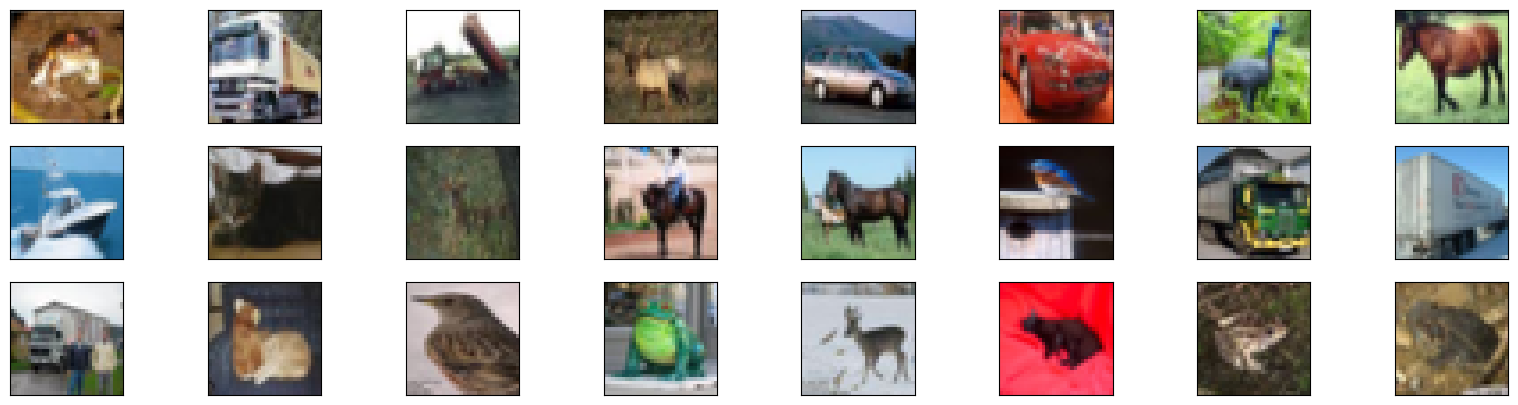

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig= plt.figure(figsize=(20,5))
for i in range(24):
  ax= fig.add_subplot(3, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(x_train[i])

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
x_train =x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Apply one hot encoding

In [9]:
from keras.utils import np_utils
from tensorflow import keras

# one ho encoding the labels
num_classes= len(np.unique(y_train))
y_train =keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Breck Dataset into Training Testing and Validation Sets

In [12]:
# breck traning set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [13]:
# print shape of trining set
print('x_train:', x_train.shape)

x_train: (45000, 32, 32, 3)


In [14]:
print('y_train:', y_train.shape)

y_train: (45000, 10)


Define The Model Archi

In [15]:
from warnings import filters
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500, activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [20]:
# Compile The Model

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy']) ###############################################################################

In [21]:


from keras.callbacks import ModelCheckpoint


In [22]:
# Train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5',save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_valid, y_valid),callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/3
1407/1407 [==============================] - 21s 7ms/step - loss: 1.6016 - accuracy: 0.4202 - val_loss: 1.3527 - val_accuracy: 0.5178
Epoch 2/3
1407/1407 [==============================] - 8s 5ms/step - loss: 1.2543 - accuracy: 0.5512 - val_loss: 1.1671 - val_accuracy: 0.5784
Epoch 3/3
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1394 - accuracy: 0.5968 - val_loss: 1.0668 - val_accuracy: 0.6180


In [26]:
# get Prediction on the test set
y_hat= model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
# evaluate test Accuracy
score = model.evaluate(x_test, y_test,verbose= 0)
accuracy = 100*score[1]


# print test accuracy
print('Test Accuracy : %.4f%%' % accuracy)

Test Accuracy : 61.5300%


In [28]:
import tensorflow as tf


In [29]:
img= keras.preprocessing.image.load_img('/content/pc1.jpg'), target_size=(32,32,3)

SyntaxError: ignored